In [1]:
!nvidia-smi

Sun May 22 18:58:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 3070    Off  | 00000000:01:00.0 Off |                  N/A |
|  0%   55C    P2    49W / 240W |    501MiB /  7979MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!python train_simple_mod.py --size 256 --channel_multiplier 2 --narrow 1 --ckpt weights --sample results --batch 1 --path images1024x1024 --pretrain weights/006000.pth --save_freq 5000 --lr 0.001

In [5]:
!python test.py --image images1024x1024/00000/00030.png --output test.png --pretrain weights/GPEN-BFR-512.pth --size 512 --is_concat

In [9]:
!python test.py --image images1024x1024/00000/00031.png --output test.png --pretrain weights/015000_bak_02693.pth --size 512 --is_concat

In [2]:
import cv2
import numpy as np
import __init_paths
from training.data_loader.dataset_face import FaceDataset
from face_model.gpen_model import FullGenerator, Discriminator
import torch
import itertools
import matplotlib.pyplot as plt

In [15]:
g_optim = torch.optim.Adam(
        [
            {"params": generator.generator.parameters(), "lr": 0.1, "betas": (0, 0.99)},
        ]
    )


In [16]:
g_optim.load_state_dict(ckpt["g_optim"])

ValueError: loaded state dict contains a parameter group that doesn't match the size of optimizer's group

---

In [5]:
generator = FullGenerator(
    512, 512, 8, channel_multiplier=2, narrow=1, device="cpu", isconcat=False
).to("cpu")

In [7]:
del generator

In [17]:
ckpt = torch.load("ffhq-512-avg-tpurun1_rm_noise.pt", map_location="cuda")

In [23]:
state_dict = {}
for num in ckpt["g_optim"]["param_groups"][0]["params"]:
    st_dict[num] = ckpt["g_optim"]["state"][num]

In [25]:
st_dict

{139: {'step': 45002,
  'exp_avg': tensor([[[[-0.0762]],
  
           [[-0.0696]],
  
           [[-0.0533]]],
  
  
          [[[ 0.0264]],
  
           [[ 0.0920]],
  
           [[ 0.0846]]],
  
  
          [[[ 0.1228]],
  
           [[ 0.1380]],
  
           [[ 0.0790]]],
  
  
          [[[-0.0324]],
  
           [[-0.0016]],
  
           [[ 0.0559]]],
  
  
          [[[ 0.0082]],
  
           [[ 0.0781]],
  
           [[ 0.0793]]],
  
  
          [[[-0.0197]],
  
           [[-0.0402]],
  
           [[-0.0326]]],
  
  
          [[[-0.0250]],
  
           [[-0.0698]],
  
           [[-0.0754]]],
  
  
          [[[ 0.0798]],
  
           [[ 0.0937]],
  
           [[ 0.1123]]],
  
  
          [[[ 0.1203]],
  
           [[ 0.1437]],
  
           [[ 0.1634]]],
  
  
          [[[ 0.0060]],
  
           [[-0.0142]],
  
           [[-0.0103]]],
  
  
          [[[ 0.0018]],
  
           [[ 0.0115]],
  
           [[ 0.0242]]],
  
  
          [[[ 0.0066]],
  
     

In [24]:
ckpt["g_optim"]["state"]

{0: {'step': 45002,
  'exp_avg': tensor([[ 7.2001e-06, -3.2652e-07,  6.4809e-06,  ...,  1.2863e-05,
           -3.5495e-07, -5.1502e-07],
          [-6.1681e-05,  2.7972e-06, -5.5520e-05,  ..., -1.1019e-04,
            3.0407e-06,  4.4120e-06],
          [ 3.3368e-05, -1.5132e-06,  3.0035e-05,  ...,  5.9613e-05,
           -1.6450e-06, -2.3868e-06],
          ...,
          [ 1.6992e-04, -7.7058e-06,  1.5295e-04,  ...,  3.0357e-04,
           -8.3767e-06, -1.2154e-05],
          [-5.9962e-05,  2.7193e-06, -5.3973e-05,  ..., -1.0712e-04,
            2.9560e-06,  4.2891e-06],
          [ 2.8991e-04, -1.3147e-05,  2.6095e-04,  ...,  5.1793e-04,
           -1.4292e-05, -2.0737e-05]]),
  'exp_avg_sq': tensor([[7.7527e-10, 9.6178e-12, 4.8119e-10,  ..., 2.4213e-09, 1.9395e-12,
           2.0069e-12],
          [4.5844e-10, 5.0436e-12, 2.8568e-10,  ..., 1.3970e-09, 1.1708e-12,
           1.0995e-12],
          [8.4807e-10, 1.0034e-11, 5.5500e-10,  ..., 2.7085e-09, 2.4387e-12,
           2.1896

In [10]:
keys = generator.generator.state_dict().keys() - ckpt["g"].keys()

In [18]:
noise = {}
for key in keys:
    noise[key] = generator.generator.state_dict()[key]

In [19]:
noise

{'convs.11.noise.weight2': tensor([0.], device='cuda:0'),
 'convs.8.noise.weight2': tensor([0.], device='cuda:0'),
 'convs.7.noise.weight2': tensor([0.], device='cuda:0'),
 'convs.1.noise.weight2': tensor([0.], device='cuda:0'),
 'conv1.noise.weight2': tensor([0.], device='cuda:0'),
 'convs.12.noise.weight2': tensor([0.], device='cuda:0'),
 'convs.2.noise.weight2': tensor([0.], device='cuda:0'),
 'convs.3.noise.weight2': tensor([0.], device='cuda:0'),
 'convs.10.noise.weight2': tensor([0.], device='cuda:0'),
 'convs.0.noise.weight2': tensor([0.], device='cuda:0'),
 'convs.5.noise.weight2': tensor([0.], device='cuda:0'),
 'convs.13.noise.weight2': tensor([0.], device='cuda:0'),
 'convs.6.noise.weight2': tensor([0.], device='cuda:0'),
 'convs.4.noise.weight2': tensor([0.], device='cuda:0'),
 'convs.9.noise.weight2': tensor([0.], device='cuda:0')}

In [20]:
ckpt["g_ema"].update(noise)
ckpt["g"].update(noise)

In [22]:
generator.generator.load_state_dict(ckpt["g"])

<All keys matched successfully>

In [23]:
torch.save(ckpt, "ffhq-512-avg-tpurun1_rm_noise_w2.pt")

In [ ]:
noise = {}
for key in ckpt[g].keys():
    if key.split(".")[-2] == "noise":
        noise[key] = generator.generator.state_dict()[key]

In [10]:
generator.generator.state_dict()['convs.0.noise.weight2']

tensor([0.], device='cuda:0')

In [34]:
noise = {}
for key in generator.generator.state_dict().keys():
    if key.split(".")[-2] == "noise":
        noise[key] = generator.generator.state_dict()[key]

In [35]:
noise

{'conv1.noise.weight': tensor([-0.0167]),
 'conv1.noise.weight2': tensor([-0.0013]),
 'convs.0.noise.weight': tensor([0.0211]),
 'convs.0.noise.weight2': tensor([0.0010]),
 'convs.1.noise.weight': tensor([0.0162]),
 'convs.1.noise.weight2': tensor([-0.0018]),
 'convs.2.noise.weight': tensor([-0.0093]),
 'convs.2.noise.weight2': tensor([0.0119]),
 'convs.3.noise.weight': tensor([0.0129]),
 'convs.3.noise.weight2': tensor([0.0054]),
 'convs.4.noise.weight': tensor([0.0068]),
 'convs.4.noise.weight2': tensor([0.0277]),
 'convs.5.noise.weight': tensor([0.0024]),
 'convs.5.noise.weight2': tensor([0.0343]),
 'convs.6.noise.weight': tensor([0.0011]),
 'convs.6.noise.weight2': tensor([-0.2131]),
 'convs.7.noise.weight': tensor([0.0033]),
 'convs.7.noise.weight2': tensor([0.0520]),
 'convs.8.noise.weight': tensor([-0.1369]),
 'convs.8.noise.weight2': tensor([0.1754]),
 'convs.9.noise.weight': tensor([-0.0045]),
 'convs.9.noise.weight2': tensor([-0.1021]),
 'convs.10.noise.weight': tensor([-0.05

In [3]:
ckpt = torch.load("weights/050000.pth", map_location="cpu")

In [53]:
ckpt["g_ema"]['generator.conv1.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.0.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.1.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.2.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.3.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.4.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.5.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.6.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.7.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.8.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.9.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.10.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.11.noise.weight'] = torch.tensor([0.0])

In [ ]:
ckpt["g_ema"].keys()

In [26]:
ckpt["g_ema"].update(noise)

In [27]:
ckpt["g"].update(noise)

In [23]:
generator.generator.load_state_dict(noise)

<All keys matched successfully>

In [30]:
ls

550000_w2.pt            face_inpainting.py*               sr_model/
GPEN_inference.ipynb    face_model/                       stylegan2.pt
README.md               face_parse/                       stylegan2_256.pt
__init_paths.py*        ffhq-512-avg-tpurun1_rm_noise.pt  test.ipynb
__pycache__/            figs/                             test.png
align_faces.py*         images1024x1024/                  test.py
demo.py                 lpips.txt                         train_simple.py
distributed.py          misc/                             train_simple_mod.py
download_ffhq_scripts/  nohup.out                         train_simple_mod2.py
evaluation.ipynb        psnr.pt                           training/
examples/               requirements.txt                  training.ipynb
face_colorization.py*   results/                          val/
face_detect/            run.sh*                           weights/
face_enhancement.py*    segmentation2face.py*


In [29]:
torch.save(ckpt, "550000_w2.pt")

In [5]:
ckpt = torch.load("/root/stylegan2-pytorch/550000.pt", map_location="cpu")

In [1]:
import torch
ckpt = torch.load("/root/stylegan2-pytorch/550000.pt", map_location="cpu")

In [3]:
ckpt["d_optim"]["param_groups"][0]["lr"] = 0.1

In [4]:
ckpt["d_optim"]['param_groups']

[{'lr': 0.1,
  'betas': (0.0, 0.9905854573074332),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False,
  'params': [139789649766728,
   139789649766800,
   139789649767160,
   139789649767232,
   139789649767592,
   139789649767808,
   139789649768096,
   139789649354824,
   139789649354896,
   139789649355256,
   139789649355472,
   139789649355760,
   139789649356120,
   139789649356192,
   139789649356552,
   139789649356768,
   139789649357056,
   139789649357416,
   139789649357488,
   139789649357848,
   139789649358064,
   139789649358352,
   139789649358712,
   139789649358784,
   139789649473896,
   139789649474112,
   139789649474400,
   139789649474832,
   139789649474904,
   139789649475264,
   139789649475480,
   139789649475768,
   139789649476128,
   139789649476200,
   139789649476416,
   139789649476488,
   139789649476560,
   139789649476632]}]

In [16]:
d_optim = torch.optim.Adam(
        generator.generator.parameters(),
        lr=0.01,
        betas=(0, 0.99),
    )

In [8]:
g_optim.load_state_dict(ckpt["g_optim"])

In [11]:
g_optim.state_dict()['param_groups'][1]

{'lr': 0.0025,
 'betas': (0, 0.99),
 'eps': 1e-08,
 'weight_decay': 0,
 'amsgrad': False,
 'params': [110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125]}

In [7]:
atts = generator.names + ["final_linear"]
params = []
for att in atts:
    params += list(getattr(generator, att).parameters())
g_optim = torch.optim.Adam(
    [
        #{"params": params, "lr": args.lr, "betas": (0, 0.99)},
        {"params": generator.generator.parameters(), "lr": 0.00025, "betas": (0, 0.99)}
    ]
)

In [9]:
g_optim.add_param_group({"params": params, "lr": 0.0025, "betas": (0, 0.99)})

In [8]:
ckpt2 = torch.load("weights/115000_bak.pth", map_location="cpu")

In [13]:
ckpt2["g_optim"]["state"][0].keys()

dict_keys(['step', 'exp_avg', 'exp_avg_sq'])

In [5]:
ckpt["g_optim"].keys()

dict_keys(['state', 'param_groups'])

In [11]:
generator.generator.load_state_dict(ckpt["g_ema"])

<All keys matched successfully>

In [12]:
discriminator = Discriminator(
    256, channel_multiplier=2, narrow=1, device="cpu"
)

In [13]:
discriminator.load_state_dict(ckpt["d"])

<All keys matched successfully>

---

In [3]:
generator = FullGenerator(
    512, 512, 8, channel_multiplier=2, narrow=1, device="cuda"#, isconcat=False
).to("cuda")

In [4]:
ckpt = torch.load("weights/GPEN-BFR-512.pth", map_location="cuda")
generator.load_state_dict(ckpt)
del ckpt

In [6]:
ckpt = torch.load("weights/015000_bak_02693.pth", map_location="cpu")
generator.load_state_dict(ckpt["g_ema"])
del ckpt

In [15]:
d = Discriminator(512)

In [16]:
d.load_state_dict(ckpt["d"])

<All keys matched successfully>

In [17]:
ckpt.keys()

dict_keys(['g_ema', 'latent_avg', 'g', 'd'])

In [5]:
ckpt = torch.load("/root/stylegan2-pytorch/ffhq-512-avg-tpurun1.pt")

In [25]:
torch.save(ckpt, "ffhq-512-avg-tpurun1_rm_noise.pt")

In [8]:
g_ema_dict = ckpt["g_ema"]

In [12]:
len(g_ema_dict.keys())

138

In [13]:
len(generator.generator.state_dict().keys())

138

In [21]:
noise_dict = ["noises.noise_0", "noises.noise_1", "noises.noise_2", "noises.noise_3", "noises.noise_4", "noises.noise_5", "noises.noise_6", "noises.noise_7", "noises.noise_8", "noises.noise_9", "noises.noise_10", "noises.noise_11", "noises.noise_12", "noises.noise_13", "noises.noise_14"]
for i in noise_dict:
    if i in ckpt["g"]:
        del ckpt["g"][i]
    if i in ckpt["g_ema"]:
        del ckpt["g_ema"][i]
#del ckpt["latent_avg"]

In [14]:
generator.generator.load_state_dict(g_ema_dict)

<All keys matched successfully>

In [4]:
ckpt = torch.load("/root/stylegan2-pytorch/ffhq-512-avg-tpurun1.pt")
generator.generator.load_state_dict(ckpt["g_ema"])
del ckpt

RuntimeError: Error(s) in loading state_dict for Generator:
	Unexpected key(s) in state_dict: "noises.noise_0", "noises.noise_1", "noises.noise_2", "noises.noise_3", "noises.noise_4", "noises.noise_5", "noises.noise_6", "noises.noise_7", "noises.noise_8", "noises.noise_9", "noises.noise_10", "noises.noise_11", "noises.noise_12", "noises.noise_13", "noises.noise_14". 

In [123]:
#ckpt["g_ema"]['generator.conv1.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.0.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.1.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.2.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.3.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.4.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.5.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.6.noise.weight'] = torch.tensor([0.0])
ckpt["g_ema"]['generator.convs.7.noise.weight'] = torch.tensor([0.0])
#ckpt["g_ema"]['generator.convs.8.noise.weight2'] = torch.tensor([0.0])
#ckpt["g_ema"]['generator.convs.9.noise.weight2'] = torch.tensor([0.0])
#ckpt["g_ema"]['generator.convs.10.noise.weight2'] = torch.tensor([0.0])
#ckpt["g_ema"]['generator.convs.11.noise.weight2'] = torch.tensor([0.0])
#ckpt["g_ema"]['generator.convs.12.noise.weight2'] = torch.tensor([0.0])
#ckpt["g_ema"]['generator.convs.13.noise.weight2'] = torch.tensor([0.0])

In [6]:
generator.load_state_dict(ckpt["g_ema"])

<All keys matched successfully>

In [7]:
dataset = FaceDataset("images1024x1024", 512)

In [8]:
def tensor2img(img_t, pmax=255.0, imtype=np.uint8):
    img_t = img_t * 0.5 + 0.5
    img_t = img_t.squeeze(0).permute(1, 2, 0).flip(2) # RGB->BGR
    img_np = np.clip(img_t.float().cpu().numpy(), 0, 1) * pmax

    return img_np.astype(imtype)

def showim(img):
    image = tensor2img(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

In [9]:
from training.data_loader.dataset_face import GPEN_degradation

In [87]:
degrader = GPEN_degradation()

In [129]:
degrader.blur_kernel_size = 41
degrader.blur_sigma = [0.1, 10]
degrader.downsample_range = [1, 20]
degrader.noise_range = [0, 25]
degrader.jpeg_range = [60, 100]

In [106]:
dataset.degrader = degrader

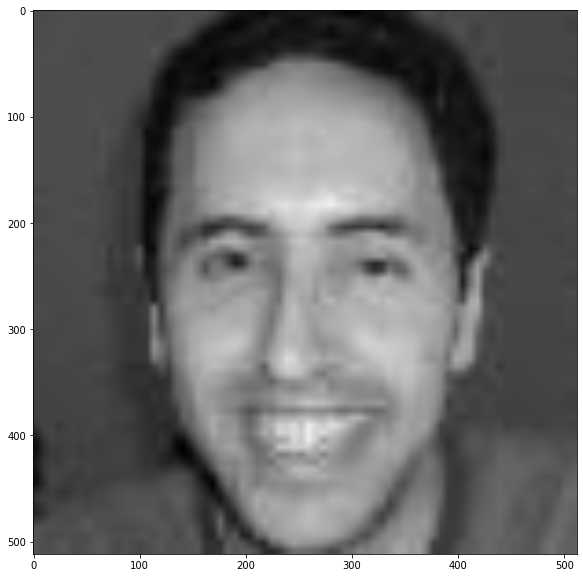

In [44]:
img = dataset[30][0]
showim(img)

In [45]:
with torch.no_grad():
    out, __ = generator(img.reshape(1, 3, 512, 512).to("cpu"))

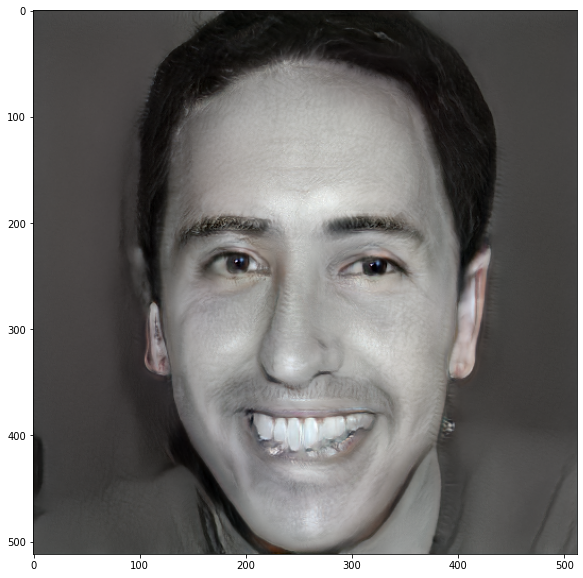

In [46]:
showim(out)

In [132]:
import random
import numpy as np

In [142]:
np.random.uniform(1, 20)

7.213859362519641

In [ ]:
names = ['ecd%d'%i for i in range(8)]

In [11]:
log_size = 9
names = ['ecd%d'%i for i in range(log_size-1)]

In [12]:
with torch.no_grad():
    noise = []
    inputs = img.reshape(1, 3, 512, 512).to("cuda")
    for i in range(log_size-1):
        ecd = getattr(generator, names[i])
        inputs = ecd(inputs)
        noise.append(inputs)
        #print(inputs.shape)
    inputs = inputs.view(inputs.shape[0], -1)
    outs = generator.final_linear(inputs)
torch.cuda.empty_cache()

In [13]:
noise = list(itertools.chain.from_iterable(itertools.repeat(x, 2) for x in noise))[::-1]

In [14]:
noise2 = []
for i in noise:
    noise2.append(torch.randn(i.shape, device="cuda"))

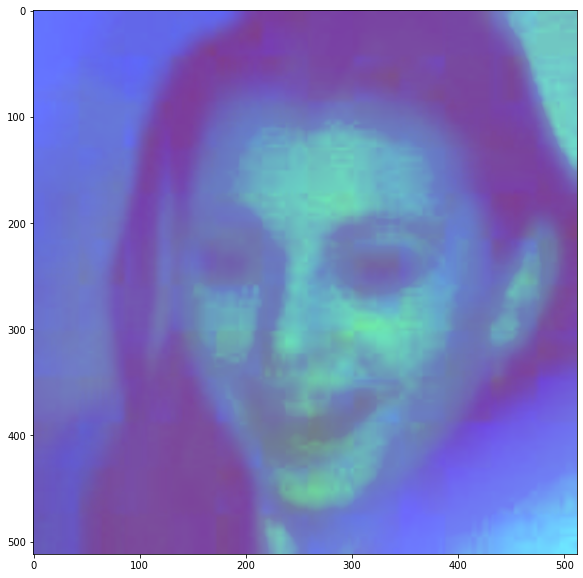

In [38]:
showim(noise[15].view(-1)[:512*512*3].view(1, 3, 512, 512))

In [30]:
noise3 = [0.1*j for i, j in zip(noise, noise2)]

In [22]:
len(noise3)

16

In [31]:
with torch.no_grad():
    res, __ = generator.generator([outs], noise=noise2[1:])

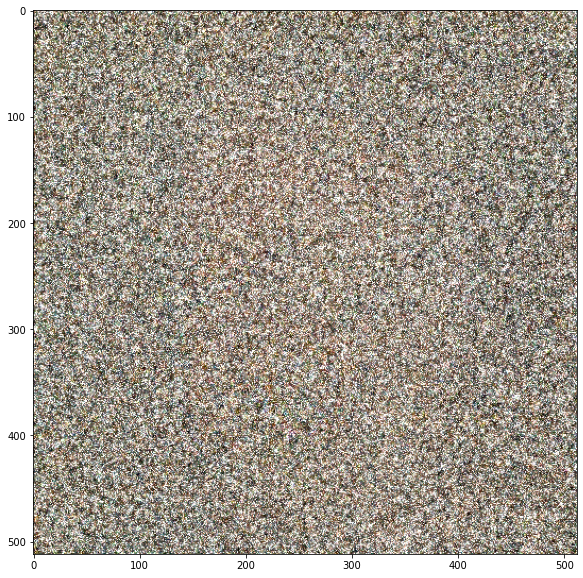

In [32]:
showim(res)